In [126]:
import pandas as pd
from os.path import exists

In [127]:
df = pd.read_csv("DATASET/B/train.csv")

In [128]:
for i, row in df.iterrows():
    if exists("DATASET/B/B/data/"+row["image_path"]) == False:
        df = df.drop(i)
    

In [129]:
df.reset_index
df.pop("Unnamed: 0")

0        8140
1       11389
3        7981
8         173
10       7942
        ...  
9447     4008
9448     6401
9449    12515
9450    11683
9456     9697
Name: Unnamed: 0, Length: 5282, dtype: int64

In [130]:
df

,image_path,Taca oli,Carrera,Agujero,Hilo fino horizontal2,Tensión horizontal,Barrado,Borrissol,Hilo fino horizontal,Punto escapado
0,4aaf06a9-frame0-00-08.95.jpg,0,0,0,1,0,0,0,0,0
1,19c8888a-frame0-00-15.68.jpg,0,0,0,0,0,0,0,0,0
3,5e93a55a-frame0-00-12.03.jpg,0,0,0,1,0,0,0,0,0
8,47b8fa6d-frame0-00-20.79.jpg,0,0,0,0,0,0,0,0,0
10,6787b1aa-frame0-00-13.24.jpg,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9447,465d9bce-frame0-00-32.28.jpg,0,0,0,0,0,0,0,0,0
9448,2efd8409-frame0-00-11.38.jpg,0,0,0,0,0,0,0,1,0
9449,6bc3fdda-frame0-00-01.45.jpg,0,0,0,0,0,0,0,0,0
9450,6efef5e7-frame0-00-09.95.jpg,0,0,0,0,0,0,0,0,0


In [131]:
df.to_csv("verd_df_clean.csv")

---

In [364]:
from sklearn.model_selection import train_test_split
df_tr, df_tst, y_train, y_test = train_test_split(df, df, test_size=0.33, random_state=42)

In [132]:
import tensorflow as tf
import cv2
from tensorflow import keras
import numpy as np

In [356]:
def create_dataset(df):
    def apply():
        for i, row in df.iterrows():
            img = cv2.cvtColor(cv2.imread("DATASET/B/B/data/"+row["image_path"]), cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (224,224)) 
            yield (img.reshape((1, 224, 224,1)) ,np.array(row)[1:].reshape(1,9))
            break
    return apply

In [297]:
next(create_dataset(df)())[0].shape

(224, 224, 1)

In [365]:
tf_df = tf.data.Dataset.from_generator(create_dataset(df_tr),output_signature=(
         tf.TensorSpec(shape=(None, 224,224, 1), dtype=tf.float32),
         tf.TensorSpec(shape=(None, 9,), dtype=tf.float32)))

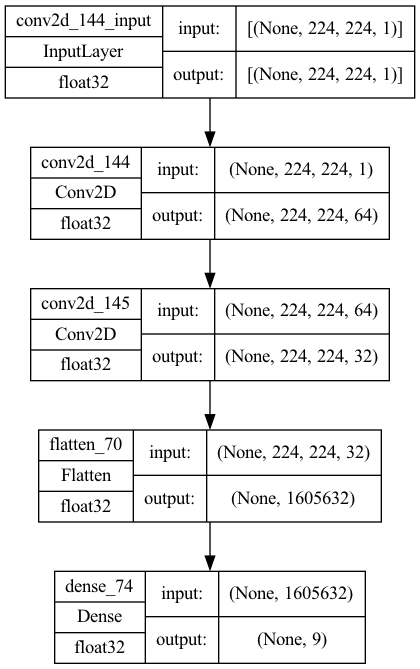

In [366]:
model = keras.Sequential([
    keras.layers.Conv2D(64, 3, activation='relu', padding="same", input_shape=(224, 224,1)),
    keras.layers.Conv2D(32, 3, activation='relu',padding="same"),
    keras.layers.Flatten(),
    keras.layers.Dense(9, activation='softmax')
])
 
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.Poisson(),
              metrics=['accuracy'])

# Fitting the model with data
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [342]:
img, label = next(create_dataset(df_tr)())
print(img.shape)
model(img.reshape(1, 224, 224, 1))

(224, 224, 1)


<tf.Tensor: shape=(1, 9), dtype=float32, numpy=
array([[1.0377263e-05, 3.1782611e-04, 1.1853952e-03, 8.9943284e-01,
        9.0439309e-04, 2.7240732e-09, 7.9022042e-02, 2.8470342e-05,
        1.9098552e-02]], dtype=float32)>

In [367]:
model.fit(tf_df, epochs=5,batch_size=1)

Epoch 1/5
1/1 [==============================] - 0s 415ms/step - loss: 2.4393 - accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 106ms/step - loss: 0.7301 - accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1.9020 - accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 0s 85ms/step - loss: 1.9020 - accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 100ms/step - loss: 1.9020 - accuracy: 1.0000


In [371]:
tf_df_tst = tf.data.Dataset.from_generator(create_dataset(df_tst),output_signature=(
         tf.TensorSpec(shape=(None, 224,224, 1), dtype=tf.float32),
         tf.TensorSpec(shape=(None, 9,), dtype=tf.float32)))

In [372]:
model.evaluate(tf_df_tst)

1/1 [==============================] - 0s 182ms/step - loss: 0.1111 - accuracy: 0.0000e+00


[0.1111111119389534, 0.0]

HAVE SOMETHING BUT 0 ACURACY! XD